# DSA x MAERSK Case Competition

__Bases of customers for analysis:__
- Customer Type (Loyal, Disloyal)
- Type of travel (Business, Personal)
- Age group (Child, Teenager, Adult, Middle Age, Senior)

In [1]:
#Set up
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
#Import data
data = pd.read_csv("https://raw.githubusercontent.com/trangjade7/Practice_Project/main/Airline%20Passenger%20Satisfaction.csv")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction score
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,4,3,4,4,5,5,25,18,neutral or dissatisfied,7
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,5,3,1,4,1,1,6,neutral or dissatisfied,3
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,4,3,4,4,4,5,0,0,satisfied,9
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,5,3,1,4,2,11,9,neutral or dissatisfied,6
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,4,4,3,3,3,0,0,satisfied,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Unnamed: 0                         129880 non-null  int64 
 1   id                                 129880 non-null  int64 
 2   Gender                             129880 non-null  object
 3   Customer Type                      129880 non-null  object
 4   Age                                129880 non-null  int64 
 5   Type of Travel                     129880 non-null  object
 6   Class                              129880 non-null  object
 7   Flight Distance                    129880 non-null  int64 
 8   Inflight wifi service              129880 non-null  int64 
 9   Departure/Arrival time convenient  129880 non-null  int64 
 10  Ease of Online booking             129880 non-null  int64 
 11  Gate location                      129880 non-null  

In [4]:
#Overview of numerical values
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction score
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64939.500000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,...,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.045465,7.222020
std,37493.270818,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,...,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.416353,2.267883
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32469.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,5.000000
50%,64939.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,7.000000
75%,97409.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,9.000000
max,129879.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,10.000000


In [5]:
#Overview of non-numerical values
data.describe(include=['object'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


#### 1. BY CUSTOMER TYPE

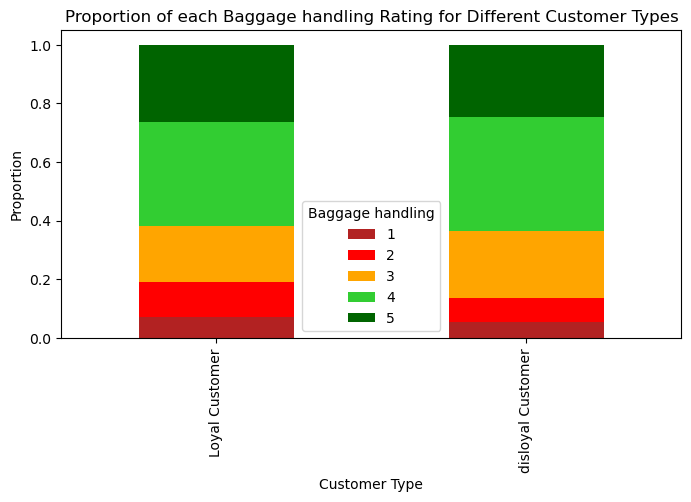

In [6]:
# For 0-5 rating
# Group the data by "Customer Type" and calculate the counts
grouped_data = data.groupby(['Customer Type', 'Baggage handling']).size().unstack()
# Calculate the proportions for each customer type
proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# Create a stacked bar chart
proportions.plot(kind='bar', stacked=True, figsize=(8, 4), color=['firebrick','red', 'orange', 'limegreen', 'darkgreen'])
# Add labels and title and show plot
plt.xlabel('Customer Type')
plt.ylabel('Proportion')
plt.title('Proportion of each Baggage handling Rating for Different Customer Types')
plt.legend(title='Baggage handling')
plt.show()

#### 2. BY TYPE OF TRAVEL

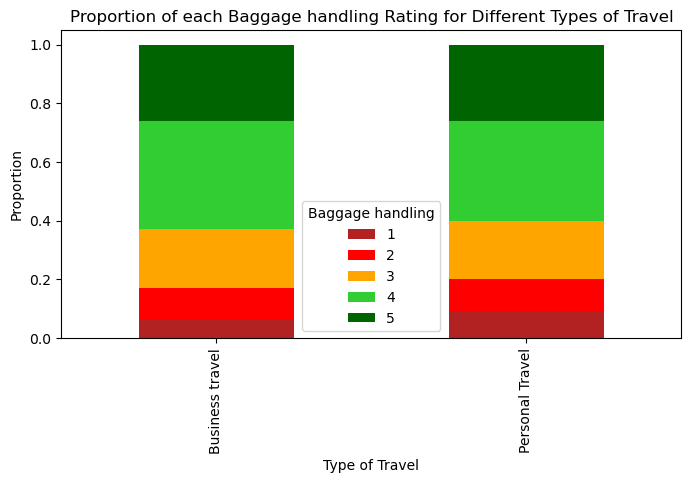

In [7]:
grouped_data = data.groupby(['Type of Travel', 'Baggage handling']).size().unstack()
proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)
proportions.plot(kind='bar', stacked=True, figsize=(8, 4), color=['firebrick','red', 'orange', 'limegreen', 'darkgreen'])
plt.xlabel('Type of Travel')
plt.ylabel('Proportion')
plt.title('Proportion of each Baggage handling Rating for Different Types of Travel')
plt.legend(title='Baggage handling')
plt.show()

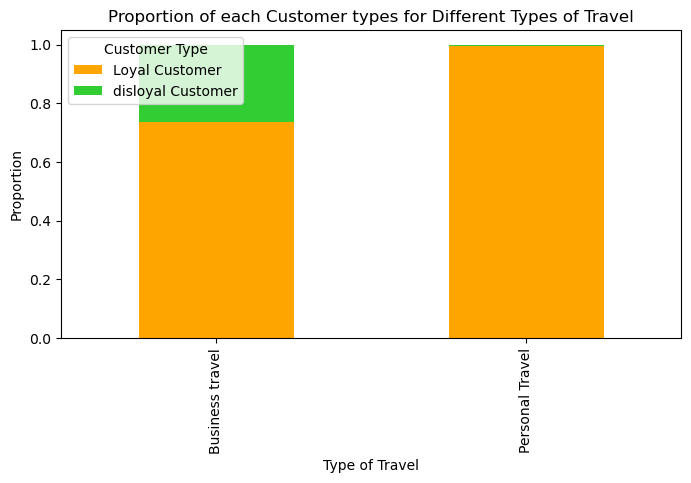

In [8]:
grouped_data = data.groupby(['Type of Travel','Customer Type' ]).size().unstack()
proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)
proportions.plot(kind='bar', stacked=True, figsize=(8, 4), color=['orange', 'limegreen', 'blue'])
plt.xlabel('Type of Travel')
plt.ylabel('Proportion')
plt.title('Proportion of each Customer types for Different Types of Travel')
plt.legend(title='Customer Type')
plt.show()

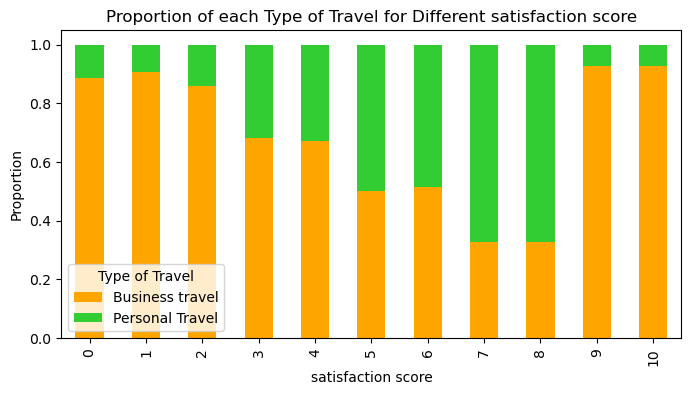

In [9]:
grouped_data = data.groupby(['satisfaction score','Type of Travel']).size().unstack()
proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)
proportions.plot(kind='bar', stacked=True, figsize=(8, 4), color=['orange', 'limegreen'])
plt.xlabel('satisfaction score')
plt.ylabel('Proportion')
plt.title('Proportion of each Type of Travel for Different satisfaction score')
plt.legend(title='Type of Travel')
plt.show()

#### 3. BY AGE GROUP
Consider the age groups as follow: 
| Age range | Age Category | 
|-----------|--------------|
| 5 to 12 | Child |
| 13 to 19| Teenager |
| 20 to 39| Adult |
| 40 to 59| Middle Age |
| 60+ | Senior |


In [10]:
#Seperate data into respective ranges and add in a new column "Age Group"
data["Age Group"] = pd.cut(
    x=data["Age"],
    bins=[5, 12, 19, 39, 59, np.inf],
    labels=["Child", "Teenager", "Adult", "Middle Age", "Senior"])
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction score,Age Group
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,3,4,4,5,5,25,18,neutral or dissatisfied,7,Teenager
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,5,3,1,4,1,1,6,neutral or dissatisfied,3,Adult
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,3,4,4,4,5,0,0,satisfied,9,Adult
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,5,3,1,4,2,11,9,neutral or dissatisfied,6,Adult
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,4,4,3,3,3,0,0,satisfied,10,Senior


In [47]:
#Count no. of values in each age group
data['Age Group'].value_counts()

Middle Age    53602
Adult         51883
Senior        12215
Teenager       7386
Child          4794
Name: Age Group, dtype: int64

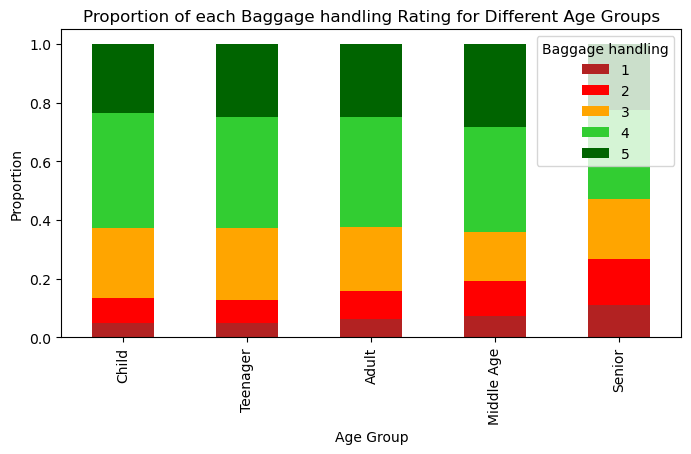

In [48]:
grouped_data = data.groupby(['Age Group', 'Baggage handling']).size().unstack()
proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)
proportions.plot(kind='bar', stacked=True, figsize=(8, 4), color=['firebrick','red', 'orange', 'limegreen', 'darkgreen'])
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.title('Proportion of each Baggage handling Rating for Different Age Groups')
plt.legend(title='Baggage handling')
plt.show()

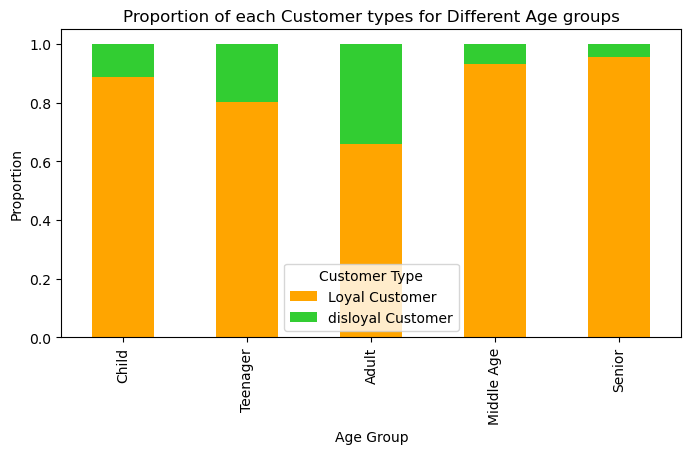

In [49]:
grouped_data = data.groupby(['Age Group','Customer Type' ]).size().unstack()
proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)
proportions.plot(kind='bar', stacked=True, figsize=(8, 4), color=['orange', 'limegreen'])
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.title('Proportion of each Customer types for Different Age groups')
plt.legend(title='Customer Type')
plt.show()

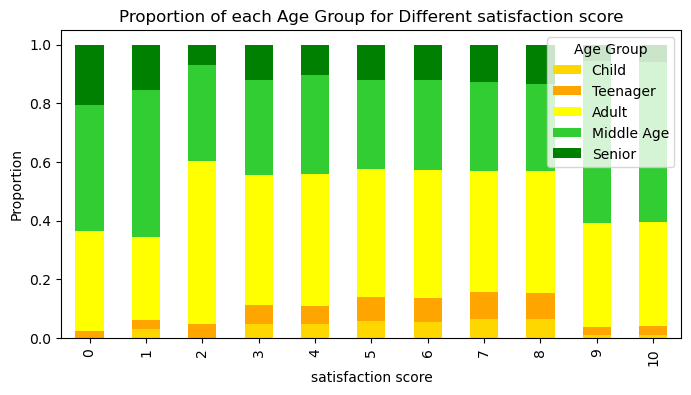

In [50]:
grouped_data = data.groupby(['satisfaction score','Age Group']).size().unstack()
proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)
proportions.plot(kind='bar', stacked=True, figsize=(8, 4), color=['gold','orange','yellow','limegreen','green'])
plt.xlabel('satisfaction score')
plt.ylabel('Proportion')
plt.title('Proportion of each Age Group for Different satisfaction score')
plt.legend(title='Age Group')
plt.show()